<a href="https://colab.research.google.com/github/xhxuciedu/cs273p/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [10]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [11]:
# Hyper-parameters
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [12]:
# Get the dataset
# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(
    root="../../data", train=True, transform=transforms.ToTensor(), download=True
)

test_dataset = torchvision.datasets.MNIST(
    root="../../data", train=False, transform=transforms.ToTensor()
)

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=False
)

## Visualize the data

In [13]:
# get a mini-batch of training samples
x, y = list(iter(train_loader))[0]

In [14]:
# check the size of mini-batch
x.shape, y.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

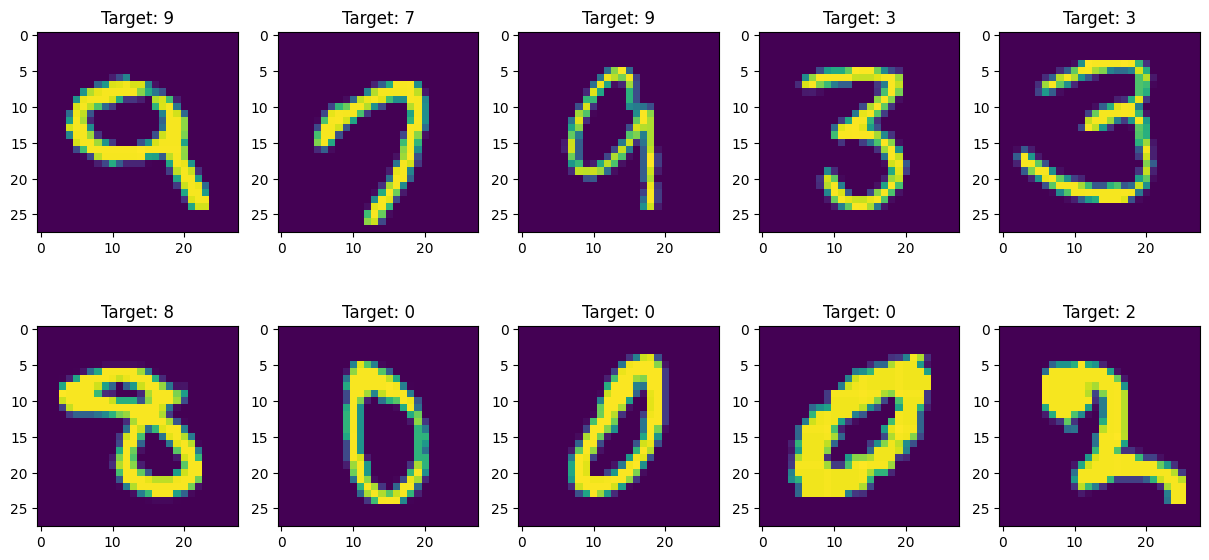

In [15]:
# plot a few samples
fig, ax = plt.subplots(2, 5, figsize=(15, 7))
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(x[i * 5 + j, 0, :, :])
        ax[i, j].set_title("Target: {}".format(y[i * 5 + j]))

## Build a logistic regression model

In [16]:
# Logistic regression model
model = nn.Linear(input_size, num_classes)

# Loss and optimizer
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [17]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28 * 28)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(
                "Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}".format(
                    epoch + 1, num_epochs, i + 1, total_step, loss.item()
                )
            )

Epoch [1/5], Step [100/600], Loss: 2.2383
Epoch [1/5], Step [200/600], Loss: 2.1273
Epoch [1/5], Step [300/600], Loss: 2.0136
Epoch [1/5], Step [400/600], Loss: 1.9539
Epoch [1/5], Step [500/600], Loss: 1.8327
Epoch [1/5], Step [600/600], Loss: 1.8156
Epoch [2/5], Step [100/600], Loss: 1.7187
Epoch [2/5], Step [200/600], Loss: 1.6891
Epoch [2/5], Step [300/600], Loss: 1.5766
Epoch [2/5], Step [400/600], Loss: 1.6281
Epoch [2/5], Step [500/600], Loss: 1.4444
Epoch [2/5], Step [600/600], Loss: 1.4651
Epoch [3/5], Step [100/600], Loss: 1.3679
Epoch [3/5], Step [200/600], Loss: 1.4141
Epoch [3/5], Step [300/600], Loss: 1.2475
Epoch [3/5], Step [400/600], Loss: 1.2775
Epoch [3/5], Step [500/600], Loss: 1.1706
Epoch [3/5], Step [600/600], Loss: 1.2950
Epoch [4/5], Step [100/600], Loss: 1.2454
Epoch [4/5], Step [200/600], Loss: 1.2081
Epoch [4/5], Step [300/600], Loss: 1.1845
Epoch [4/5], Step [400/600], Loss: 1.1474
Epoch [4/5], Step [500/600], Loss: 1.1336
Epoch [4/5], Step [600/600], Loss:

In [18]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print(
        "Accuracy of the model on the 10000 test images: {} %".format(
            100 * correct / total
        )
    )

# Save the model checkpoint
torch.save(model.state_dict(), "model.ckpt")

Accuracy of the model on the 10000 test images: 83.44999694824219 %
